In [1]:
import numpy as np
import pandas as pd
import random
from EMDPM.model_generator import generate_logistic_model
from EMDPM.synthetic_data_generator import generate_synthetic_data
from EMDPM.visualization import (
    plot_biomarker_trajectories,
    plot_true_observations,
    plot_initial_beta_guess,
    plot_theta_fit_comparison,
    plot_theta_error_history,
    plot_beta_overlay,
    plot_beta_error_history,
    plot_lse,
    plot_cog_regression_history
)
from EMDPM.utils import solve_system
from EMDPM.em_transformer_rework import EM


true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.01123988 0.01207819 0.01155182 0.02688619 0.
 0.01019029 0.         0.         0.        ]
a = 1.8531667261047913, b = 1.5312904682995265


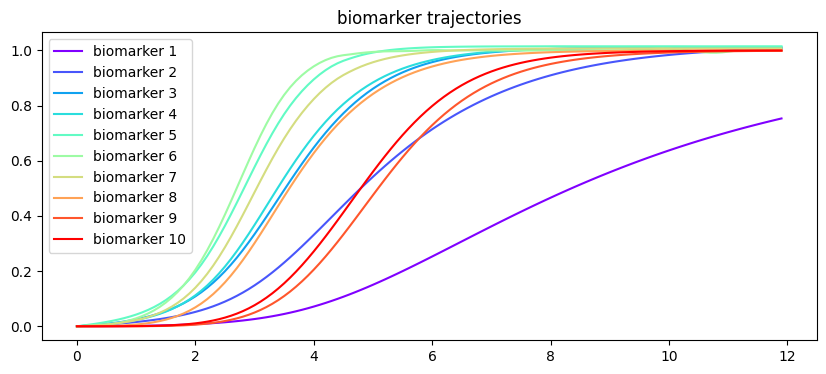

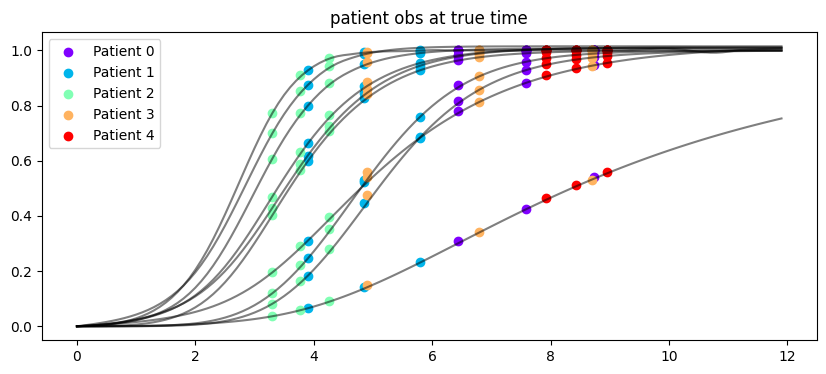

initial conditions:
n_patients: 200, n_obs: 600
initial f: [0.04265834 0.03062581 0.13285009 0.13686635 0.18663288 0.150298
 0.18537247 0.18945669 0.1733556  0.0025204 ]
initial s: [1.29863068 2.48683136 0.16573133 0.5031427  2.95964328 2.98186855
 2.48212827 2.54551839 1.26382145 2.03467892]
initial scalar K: 2.5136350483846033
initial beta: (200,)


  0%|          | 0/18 [00:00<?, ?it/s]

breakpoint:  <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarr

  6%|▌         | 1/18 [00:01<00:29,  1.71s/it]

breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint:  <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarr

 11%|█         | 2/18 [00:05<00:45,  2.87s/it]

breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>
breakpoint pre-Beta <class 'numpy.ndarray'>


capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.


KeyboardInterrupt: 

In [2]:
# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.0
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K, x0, f, scalar_K  = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t,
)
plot_biomarker_trajectories(t, x_true, n_biomarkers=n_biomarkers)
plot_true_observations(df, t, x_true)

biomarker_cols = [col for col in df.columns if col.startswith("biomarker_")]

X = df[biomarker_cols].values
dt = df["dt"].values
ids = df["patient_id"].values
cog = df["cognitive_score"].values
beta_true = df["beta_true"].values

# print(df[biomarker_cols].shape)
# print(df["dt"].shape)
# print(df["patient_id"].shape)
# print(df["cognitive_score"].shape)

em_model_0 = EM(num_iterations=18, t_max=t_max, step=0.01, use_jacobian=True, lambda_cog=0.0)
em_model_0.fit(X=X, dt=dt, ids=ids, cog=cog, K=K)

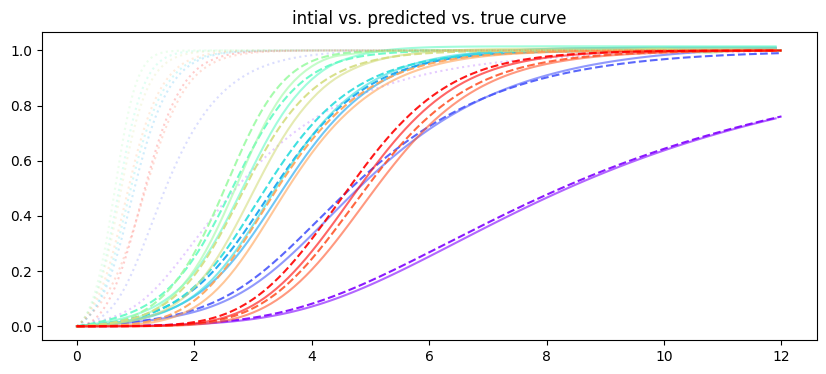

In [ ]:
f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# histories
theta_history = em_model_0.theta_history
beta_history = em_model_0.beta_history
lse_history = em_model_0.lse_history

# final params
final_theta = theta_history[:,-1]
final_x0 = np.zeros(n_biomarkers)
final_f = final_theta[0:n_biomarkers]
final_s = final_theta[n_biomarkers:2*n_biomarkers]
final_scalar_K = final_theta[-1]
final_model = solve_system(final_x0, final_f, K, t_span, final_scalar_K)

# initial parameters
initial_theta = theta_history[:,0]
initial_x0 = np.zeros(n_biomarkers)
initial_f = initial_theta[:n_biomarkers]
initial_s = initial_theta[n_biomarkers:2*n_biomarkers]
initial_scalar_K = initial_theta[-1]
initial_model = solve_system(initial_x0, initial_f, K, t_span, initial_scalar_K)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, initial_model, final_model, n_biomarkers)
#plot_beta_overlay(df, beta_iter=, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
#plot_beta_error_history(beta_history, em_model_0.num_iterations)
#plot_lse(lse_history)
#plot_cog_regression_history(em_model_0.cog_regression_history_)



In [ ]:
print("true theta:")
print("f: ", np.round(f_true, 3))
print("s: ", np.round(s_true, 3))
print("s_k: ", scalar_K_true)

print("final theta:")
print("f: ", np.round(final_theta[:n_biomarkers], 3))
print("s: ", np.round(final_theta[n_biomarkers:2*n_biomarkers], 3))
print("s_k: ", final_theta[-1])

initial theta:
f:  [0.    0.011 0.012 0.012 0.027 0.    0.01  0.    0.    0.   ]
s:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
s_k:  1.0
final theta:
f:  [0.    0.012 0.015 0.015 0.036 0.002 0.015 0.001 0.    0.   ]
s:  [0.999 1.015 1.006 1.005 1.004 0.999 1.003 0.999 0.997 0.998]
s_k:  0.9993432859601856


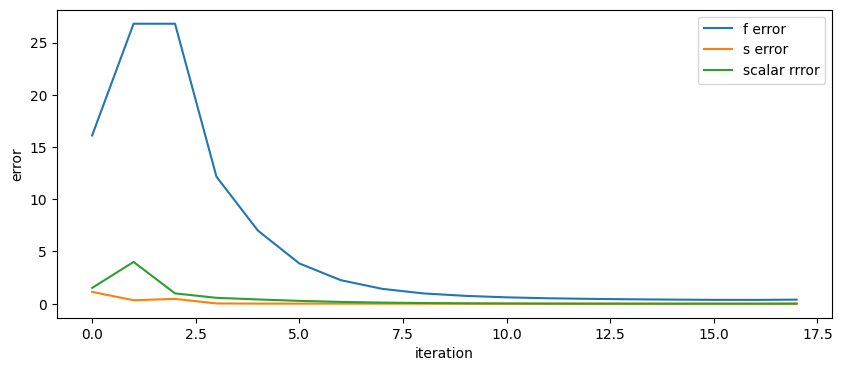

In [ ]:
import matplotlib.pyplot as plt

def plot_theta_error_history(theta_history: np.ndarray, n_biomarkers: int, num_iterations: int,
                             f_true: np.ndarray, s_true: np.ndarray, scalar_K_true: float) -> None:
    """
    Plots normalized error of each parameter group over EM iterations.
    """
    f_error_history = []
    s_error_history = []
    scalar_K_error_history = []

    for iteration in range(num_iterations):
        theta = theta_history[:,iteration]

        f_est = theta[0:n_biomarkers]
        s_est = theta[n_biomarkers:2*n_biomarkers]
        scalar_K_est = theta[-1]

        f_err = np.mean(np.abs(f_true - f_est)) / (np.mean(np.abs(f_true)) + 1e-8)
        s_err = np.mean(np.abs(s_true - s_est)) / (np.mean(np.abs(s_true)) + 1e-8)
        k_err = np.abs(scalar_K_true - scalar_K_est) / (np.abs(scalar_K_true) + 1e-8)

        f_error_history.append(f_err)
        s_error_history.append(s_err)
        scalar_K_error_history.append(k_err)
        
    plt.figure(figsize=(10, 4))
    plt.plot(f_error_history, label="f error")
    plt.plot(s_error_history, label="s error")
    plt.plot(scalar_K_error_history, label="scalar rrror")
    plt.xlabel("iteration")
    plt.ylabel("error")
    plt.legend()
    plt.show()
    
plot_theta_error_history(theta_history=theta_history, n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations, f_true=f, s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)

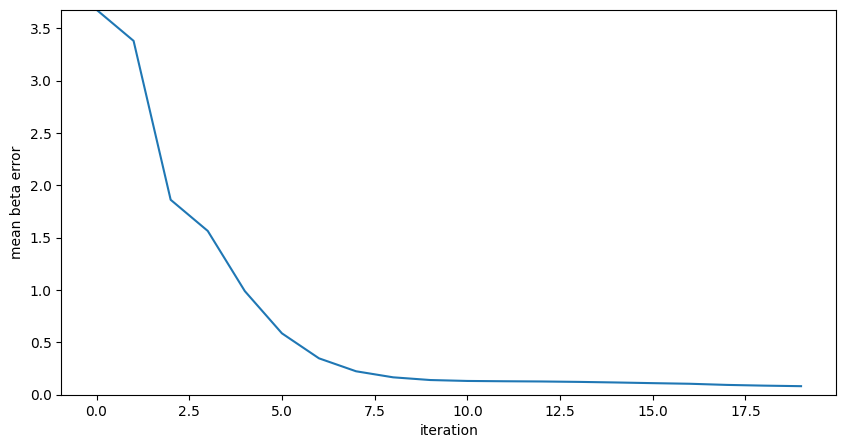

In [ ]:
def plot_beta_error_history(beta_history: np.ndarray, beta_true: np.ndarray, num_iterations: int) -> None:
    """
    Plots mean beta estimation error over EM iterations.
    """
    beta_error_history = []
    for iteration in range(num_iterations):
        beta_estimated = beta_history[:, iteration]
        
        beta_error = np.abs(beta_estimated - beta_true)
        beta_error_history.append(np.mean(beta_error))
        
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(beta_error_history)), beta_error_history)
    plt.ylim([0, max(beta_error_history)])
    plt.xlabel("iteration")
    plt.ylabel("mean beta error")
    plt.show()

beta_true = df.groupby("patient_id")["beta_true"].first().values
plot_beta_error_history(beta_history, beta_true, em_model_0.num_iterations)

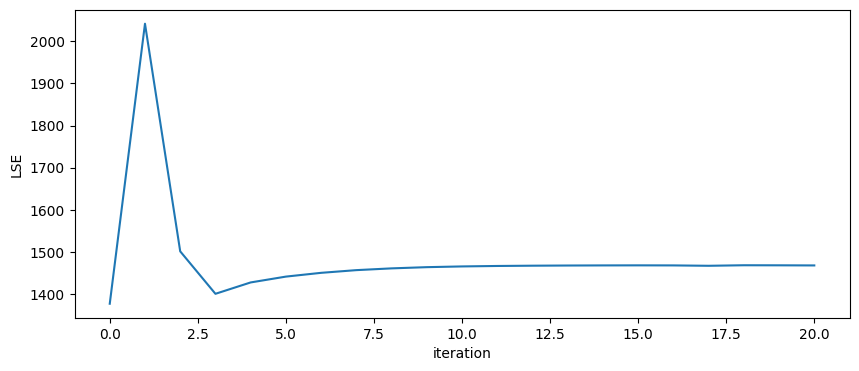

In [ ]:
plot_lse(lse_history)